# dataset

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

df = breast_cancer_wisconsin_diagnostic.data.original
df

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


# preprocess

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

In [ ]:
# drop kolom selain fitur
X = df.drop(['ID', 'Diagnosis'], axis=1)
y = df['Diagnosis']

In [ ]:
print("Fitur:", X.shape, "Kelas:", y.shape)
print(df['Diagnosis'].value_counts())

Fitur: (569, 30) Kelas: (569,)
Diagnosis
B    357
M    212
Name: count, dtype: int64


# SVM (semua fitur)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

**skenario 1 (split 90:10)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Train size: 512, Test size: 57
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        39
           M       1.00      0.94      0.97        18

    accuracy                           0.98        57
   macro avg       0.99      0.97      0.98        57
weighted avg       0.98      0.98      0.98        57



**skenario 2 (split 80:20)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Train size: 455, Test size: 114
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        69
           M       0.93      0.93      0.93        45

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



**skenario 3 (split 70:30)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Train size: 398, Test size: 171
              precision    recall  f1-score   support

           B       0.95      0.97      0.96       104
           M       0.95      0.93      0.94        67

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



**skenario 4 (split 60:40)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Train size: 341, Test size: 228
              precision    recall  f1-score   support

           B       0.94      0.97      0.95       140
           M       0.95      0.90      0.92        88

    accuracy                           0.94       228
   macro avg       0.94      0.93      0.94       228
weighted avg       0.94      0.94      0.94       228



# RFE test

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

In [ ]:
X = df.drop(['ID', 'Diagnosis'], axis=1)
y = df['Diagnosis']

# SVM sebagai estimator
estimator = SVC(kernel="linear")

# RFE dengan SVM
model = RFE(estimator, n_features_to_select=1, step=1)
model = model.fit(X, y)

# dataframe baru untuk menampilkan hasil ranking fitur
ranking_df = pd.DataFrame({'Fitur': X.columns,
                           'Ranking': model.ranking_})

print(ranking_df.sort_values(by='Ranking'))

                 Fitur  Ranking
27     concave_points3        1
26          concavity3        2
28           symmetry3        3
25        compactness3        4
24         smoothness3        5
11            texture2        6
20             radius3        7
0              radius1        8
6           concavity1        9
7      concave_points1       10
8            symmetry1       11
5         compactness1       12
4          smoothness1       13
12          perimeter2       14
21            texture3       15
2           perimeter1       16
29  fractal_dimension3       17
16          concavity2       18
15        compactness2       19
17     concave_points2       20
1             texture1       21
13               area2       22
14         smoothness2       23
22          perimeter3       24
10             radius2       25
19  fractal_dimension2       26
9   fractal_dimension1       27
18           symmetry2       28
23               area3       29
3                area1       30


# **perlatihan model SVM (25 fitur)**

**skenario 1 (split 90:10)**

In [ ]:
X = X.drop(['fractal_dimension2','fractal_dimension1','symmetry2',
            'area3','area1'], axis=1)

print("Fitur:", X.shape, "Kelas:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Fitur: (569, 25) Kelas: (569,)
Train size: 512, Test size: 57
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        39
           M       1.00      0.94      0.97        18

    accuracy                           0.98        57
   macro avg       0.99      0.97      0.98        57
weighted avg       0.98      0.98      0.98        57



**skenario 2 (split 80:20)**

In [ ]:
print("Fitur:", X.shape, "Kelas:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Fitur: (569, 25) Kelas: (569,)
Train size: 455, Test size: 114
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        69
           M       0.93      0.93      0.93        45

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



**skenario 3 (split 70:30)**

In [ ]:
print("Fitur:", X.shape, "Kelas:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Fitur: (569, 25) Kelas: (569,)
Train size: 398, Test size: 171
              precision    recall  f1-score   support

           B       0.96      0.96      0.96       104
           M       0.94      0.94      0.94        67

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



**skenario 4 (split 60:40)**

In [ ]:
print("Fitur:", X.shape, "Kelas:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Fitur: (569, 25) Kelas: (569,)
Train size: 341, Test size: 228
              precision    recall  f1-score   support

           B       0.94      0.97      0.95       140
           M       0.95      0.90      0.92        88

    accuracy                           0.94       228
   macro avg       0.94      0.93      0.94       228
weighted avg       0.94      0.94      0.94       228



# **perlatihan model SVM (20 fitur)**

**skenario 1 (split 90:10)**

In [ ]:
X = X.drop(['texture1','area2','smoothness2',
            'perimeter3','radius2'], axis=1)

print("Fitur:", X.shape, "Kelas:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Fitur: (569, 20) Kelas: (569,)
Train size: 512, Test size: 57
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        39
           M       1.00      0.94      0.97        18

    accuracy                           0.98        57
   macro avg       0.99      0.97      0.98        57
weighted avg       0.98      0.98      0.98        57



**skenario 2 (split 80:20)**

In [ ]:
print("Fitur:", X.shape, "Kelas:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Fitur: (569, 20) Kelas: (569,)
Train size: 455, Test size: 114
              precision    recall  f1-score   support

           B       0.96      0.94      0.95        69
           M       0.91      0.93      0.92        45

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



**skenario 3 (split 70:30)**

In [ ]:
print("Fitur:", X.shape, "Kelas:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Fitur: (569, 20) Kelas: (569,)
Train size: 398, Test size: 171
              precision    recall  f1-score   support

           B       0.96      0.95      0.96       104
           M       0.93      0.94      0.93        67

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



**skenario 4 (split 60:40)**

In [ ]:
print("Fitur:", X.shape, "Kelas:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Fitur: (569, 20) Kelas: (569,)
Train size: 341, Test size: 228
              precision    recall  f1-score   support

           B       0.94      0.97      0.96       140
           M       0.95      0.91      0.93        88

    accuracy                           0.95       228
   macro avg       0.95      0.94      0.94       228
weighted avg       0.95      0.95      0.95       228



# **perlatihan model SVM (15 fitur)**

**skenario 1 (split 90:10)**

In [ ]:
X = X.drop(['perimeter1','fractal_dimension3','concavity2',
            'compactness2','concave_points2'], axis=1)

print("Fitur:", X.shape, "Kelas:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Fitur: (569, 15) Kelas: (569,)
Train size: 512, Test size: 57
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        39
           M       1.00      0.94      0.97        18

    accuracy                           0.98        57
   macro avg       0.99      0.97      0.98        57
weighted avg       0.98      0.98      0.98        57



**skenario 2 (split 80:20)**

In [ ]:
print("Fitur:", X.shape, "Kelas:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Fitur: (569, 15) Kelas: (569,)
Train size: 455, Test size: 114
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        69
           M       0.93      0.93      0.93        45

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



**skenario 3 (split 70:30)**

In [ ]:
print("Fitur:", X.shape, "Kelas:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Fitur: (569, 15) Kelas: (569,)
Train size: 398, Test size: 171
              precision    recall  f1-score   support

           B       0.96      0.96      0.96       104
           M       0.94      0.94      0.94        67

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



**skenario 4 (split 60:40)**

In [ ]:
print("Fitur:", X.shape, "Kelas:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Fitur: (569, 15) Kelas: (569,)
Train size: 341, Test size: 228
              precision    recall  f1-score   support

           B       0.94      0.97      0.96       140
           M       0.95      0.91      0.93        88

    accuracy                           0.95       228
   macro avg       0.95      0.94      0.94       228
weighted avg       0.95      0.95      0.95       228



# **pelatihan model SVM (10 fitur)**

**skenario 1 (split 90:10)**

In [ ]:
X = X.drop(['symmetry1','compactness1','smoothness1',
            'perimeter2','texture3'], axis=1)

print("Fitur:", X.shape, "Kelas:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Fitur: (569, 10) Kelas: (569,)
Train size: 512, Test size: 57
              precision    recall  f1-score   support

           B       0.97      0.95      0.96        39
           M       0.89      0.94      0.92        18

    accuracy                           0.95        57
   macro avg       0.93      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



**skenario 2 (split 80:20)**

In [ ]:
print("Fitur:", X.shape, "Kelas:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Fitur: (569, 10) Kelas: (569,)
Train size: 455, Test size: 114
              precision    recall  f1-score   support

           B       0.96      0.93      0.94        69
           M       0.89      0.93      0.91        45

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



**skenario 3 (split 70:30)**

In [ ]:
print("Fitur:", X.shape, "Kelas:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Fitur: (569, 10) Kelas: (569,)
Train size: 398, Test size: 171
              precision    recall  f1-score   support

           B       0.95      0.94      0.95       104
           M       0.91      0.93      0.92        67

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



**skenario 4 (split 60:40)**

In [ ]:
print("Fitur:", X.shape, "Kelas:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Fitur: (569, 10) Kelas: (569,)
Train size: 341, Test size: 228
              precision    recall  f1-score   support

           B       0.93      0.97      0.95       140
           M       0.95      0.89      0.92        88

    accuracy                           0.94       228
   macro avg       0.94      0.93      0.93       228
weighted avg       0.94      0.94      0.94       228



# Confussion Matrix

In [ ]:
import pandas as pd


In [ ]:
conf_matrix = confusion_matrix(y_predict, y_test)

conf_matrix_df = pd.DataFrame(conf_matrix, index=['Malignant', 'Benign'], columns=['Malignant', 'Benign'])

sns.heatmap(conf_matrix_df, annot=True, fmt="d", )
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.title("Confusion Matrix")
plt.show()

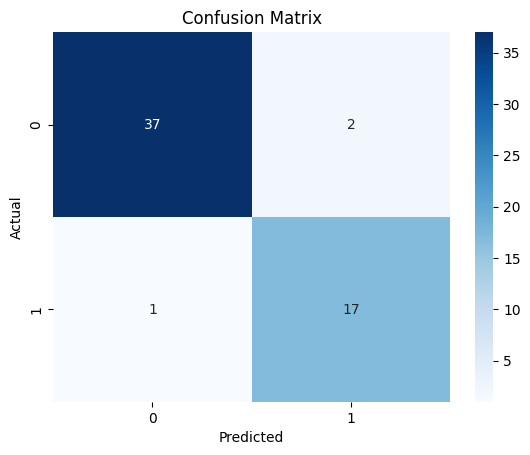

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_predict)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Class mapping: ", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Class mapping:  {'B': 0, 'M': 1}


In [ ]:
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)

True Negatives (TN): 37
False Positives (FP): 2
False Negatives (FN): 1
True Positives (TP): 17


# pelatihan model (5 fitur)

In [ ]:
X = X.drop(['texture2','radius3','radius1',
            'concavity1','concave_points1'], axis=1)

print("Fitur:", X.shape, "Kelas:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Fitur: (569, 5) Kelas: (569,)
Train size: 512, Test size: 57
              precision    recall  f1-score   support

           B       0.84      0.95      0.89        39
           M       0.85      0.61      0.71        18

    accuracy                           0.84        57
   macro avg       0.84      0.78      0.80        57
weighted avg       0.84      0.84      0.83        57



# 11-14 fitur

**pelatihan model (11 fitur)**

In [ ]:
X = df.drop(['ID','Diagnosis',
             'compactness1','smoothness1','perimeter2',
             'texture3','perimeter1','fractal_dimension3','concavity2',
             'compactness2','concave_points2','texture1','area2',
             'smoothness2','perimeter3','radius2','fractal_dimension2',
             'fractal_dimension1','symmetry2','area3','area1'], axis=1)

print("Fitur:", X.shape, "Kelas:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Fitur: (569, 11) Kelas: (569,)
Train size: 341, Test size: 228
              precision    recall  f1-score   support

           B       0.94      0.97      0.95       140
           M       0.95      0.90      0.92        88

    accuracy                           0.94       228
   macro avg       0.94      0.93      0.94       228
weighted avg       0.94      0.94      0.94       228



**pelatihan model (12 fitur)**

In [ ]:
X = df.drop(['ID','Diagnosis',
             'smoothness1','perimeter2',
             'texture3','perimeter1','fractal_dimension3','concavity2',
             'compactness2','concave_points2','texture1','area2',
             'smoothness2','perimeter3','radius2','fractal_dimension2',
             'fractal_dimension1','symmetry2','area3','area1'], axis=1)

print("Fitur:", X.shape, "Kelas:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Fitur: (569, 12) Kelas: (569,)
Train size: 341, Test size: 228
              precision    recall  f1-score   support

           B       0.94      0.97      0.95       140
           M       0.95      0.90      0.92        88

    accuracy                           0.94       228
   macro avg       0.94      0.93      0.94       228
weighted avg       0.94      0.94      0.94       228



**pelatihan model (13 fitur)**

In [ ]:
X = df.drop(['ID','Diagnosis',
             'perimeter2',
             'texture3','perimeter1','fractal_dimension3','concavity2',
             'compactness2','concave_points2','texture1','area2',
             'smoothness2','perimeter3','radius2','fractal_dimension2',
             'fractal_dimension1','symmetry2','area3','area1'], axis=1)

print("Fitur:", X.shape, "Kelas:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Fitur: (569, 13) Kelas: (569,)
Train size: 341, Test size: 228
              precision    recall  f1-score   support

           B       0.94      0.97      0.95       140
           M       0.95      0.90      0.92        88

    accuracy                           0.94       228
   macro avg       0.94      0.93      0.94       228
weighted avg       0.94      0.94      0.94       228



**pelatihan model (14 fitur)**

In [ ]:
X = df.drop(['ID','Diagnosis',
             'texture3','perimeter1','fractal_dimension3','concavity2',
             'compactness2','concave_points2','texture1','area2',
             'smoothness2','perimeter3','radius2','fractal_dimension2',
             'fractal_dimension1','symmetry2','area3','area1'], axis=1)

print("Fitur:", X.shape, "Kelas:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    random_state=2)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

Fitur: (569, 14) Kelas: (569,)
Train size: 341, Test size: 228
              precision    recall  f1-score   support

           B       0.94      0.98      0.96       140
           M       0.96      0.90      0.93        88

    accuracy                           0.95       228
   macro avg       0.95      0.94      0.94       228
weighted avg       0.95      0.95      0.95       228



# .

In [ ]:
import joblib

# save model
joblib.dump(model, 'svm_15.pkl')

loaded_model = joblib.load('svm_15.pkl')

In [ ]:
estimator.fit(X,y)

SVC(kernel='linear')

In [ ]:
from sklearn.metrics import confusion_matrix
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Mendapatkan nilai FN, FP, TN, dan TP dari confusion matrix
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Mencetak nilai FN, FP, TN, dan TP
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)

True Negatives (TN): 39
False Positives (FP): 0
False Negatives (FN): 1
True Positives (TP): 17


In [ ]:
pd.DataFrame({'Fitur': X.columns, 'Bobot': estimator.coef_[0]})

,Fitur,Bobot
0,radius1,-1.169149
1,texture1,-0.039866
2,perimeter1,0.060986
3,area1,0.001179
4,smoothness1,0.292607
5,compactness1,0.245077
6,concavity1,0.683705
7,concave_points1,0.418968
8,symmetry1,0.415847
9,fractal_dimension1,0.017464
